In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
df = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.info()      # there is no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
df.duplicated().sum()          # checking for no of duplicated values

0

In [9]:
df.drop(columns = ['Serial No.'], inplace = True)         # removeing the serial no columns from the dataset

In [11]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
# first we will split the dataset into train and test and then we scale as min-max bcz we know the range thats why we use min-max scale

X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41);

In [36]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
158,306,106,2,2.0,2.5,8.14,0
142,331,115,5,4.0,3.5,9.44,1
110,305,108,5,3.0,3.0,8.48,0
157,309,104,2,2.0,2.5,8.26,0
454,310,105,2,3.0,3.5,8.01,0
...,...,...,...,...,...,...,...
80,312,105,3,2.0,3.0,8.02,1
482,328,113,4,4.0,2.5,8.77,1
396,325,107,3,3.0,3.5,9.11,1
419,308,102,2,2.0,3.5,7.98,1


In [38]:
# now we will do the min-max scaling 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [41]:
X_train_scaled

array([[0.32      , 0.48148148, 0.25      , ..., 0.375     , 0.42948718,
        0.        ],
       [0.82      , 0.81481481, 1.        , ..., 0.625     , 0.84615385,
        1.        ],
       [0.3       , 0.55555556, 1.        , ..., 0.5       , 0.53846154,
        0.        ],
       ...,
       [0.7       , 0.51851852, 0.5       , ..., 0.625     , 0.74038462,
        1.        ],
       [0.36      , 0.33333333, 0.25      , ..., 0.625     , 0.37820513,
        1.        ],
       [0.44      , 0.59259259, 0.25      , ..., 0.75      , 0.71153846,
        0.        ]])

In [43]:
# now we will  create the neural network architecture

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [59]:
model = Sequential()

model.add(Dense(7, activation = 'relu', input_dim = 7))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))               # though we are working with regression model thus we have use the output activation function as linear function

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(loss = 'mean_squared_error', optimizer = 'Adam')

In [62]:
histroy = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)        # training the model

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.7975 - val_loss: 1.5158
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5001 - val_loss: 1.2519
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2008 - val_loss: 1.0295
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9743 - val_loss: 0.8232
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7905 - val_loss: 0.6415
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5769 - val_loss: 0.4686
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4197 - val_loss: 0.2894
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2532 - val_loss: 0.1474
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1248 - val_loss: 0.0634
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0515 - val_loss: 0.0260
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0199 - val_loss: 0.0119
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.

In [63]:
# now do the predictions 

y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [64]:
from sklearn.metrics import accuracy_score, r2_score

In [65]:
r2_score(y_test,y_pred)

0.5646939446679808

In [69]:
histroy.history

{'loss': [1.7227237224578857,
  1.4210145473480225,
  1.1675117015838623,
  0.9462655782699585,
  0.7499620318412781,
  0.5677446126937866,
  0.3873783051967621,
  0.22124609351158142,
  0.10550133138895035,
  0.04171162098646164,
  0.01606963574886322,
  0.0079237911850214,
  0.006244382821023464,
  0.00612010108307004,
  0.006133268587291241,
  0.0060876174829900265,
  0.006028724368661642,
  0.005986432079225779,
  0.005959906615316868,
  0.005935992579907179,
  0.005918830633163452,
  0.005900551564991474,
  0.005875035654753447,
  0.005855313967913389,
  0.005836610682308674,
  0.00580755528062582,
  0.005793177988380194,
  0.005761764943599701,
  0.0057395757175982,
  0.005719812586903572,
  0.0056982384994626045,
  0.005682769697159529,
  0.005656884983181953,
  0.005642449948936701,
  0.005618846509605646,
  0.005605769343674183,
  0.005578602664172649,
  0.00556312408298254,
  0.005543394945561886,
  0.005524092819541693,
  0.005507973022758961,
  0.005491732619702816,
  0.005

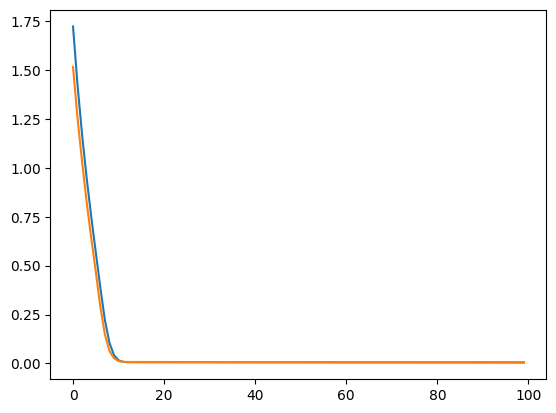

In [70]:
# we now checking vadition and training losses

import matplotlib.pyplot as plt
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])